In [1]:
# importing the required modules

import pandas as pd
import matplotlib.pyplot as plt
import statistics
import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import math

In [2]:
import pandas_profiling

C:\Users\C. Dev\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# reading the csv file storing in a datafrme

df_walmart = pd.read_csv(r'C:\Users\C. Dev\Downloads\1577429980_walmart_store_sales\Walmart_Store_sales.csv')

In [4]:
pandas_profiling.ProfileReport(df_walmart)

In [315]:
# viewing the dataframe

df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [316]:
# dataframe description 

df_walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [317]:
# dataframe information 

df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Basic Statistics Tasks

In [350]:
# function to calculate the net sales of each store

def store_net_sales():
    store_net_sales = {}
    for i in range(1,max(df_walmart['Store']+1)):
        sales = df_walmart.loc[df_walmart['Store'] == i, 'Weekly_Sales'].sum()
        store_net_sales[i] = sales
    return store_net_sales

sales = store_net_sales()
print(sales)

{1: 222402808.85, 2: 275382440.97999996, 3: 57586735.06999999, 4: 299543953.38, 5: 45475688.900000006, 6: 223756130.64000002, 7: 81598275.14, 8: 129951181.12999998, 9: 77789218.99000001, 10: 271617713.89, 11: 193962786.8, 12: 144287230.15, 13: 286517703.8, 14: 288999911.34000003, 15: 89133683.92, 16: 74252425.39999999, 17: 127782138.83000003, 18: 155114734.21000004, 19: 206634862.09999996, 20: 301397792.46000004, 21: 108117878.91999999, 22: 147075648.57, 23: 198750617.85000002, 24: 194016021.28000003, 25: 101061179.16999999, 26: 143416393.79, 27: 253855916.88, 28: 189263680.57999998, 29: 77141554.30999999, 30: 62716885.120000005, 31: 199613905.5, 32: 166819246.16000003, 33: 37160221.95999999, 34: 138249763.0, 35: 131520672.08, 36: 53412214.97, 37: 74202740.32, 38: 55159626.42, 39: 207445542.46999997, 40: 137870309.79, 41: 181341934.89, 42: 79565752.42999999, 43: 90565435.41, 44: 43293087.84, 45: 112395341.42000002}


In [320]:
# Which store has maximum sales

store_with_max_sales = max(sales, key = sales.get)
max_sales = sales[store_with_max_sales]
print("Store",store_with_max_sales,"has the max sales with sales value",max_sales)

Store 20 has the max sales with sales value 301397792.46000004


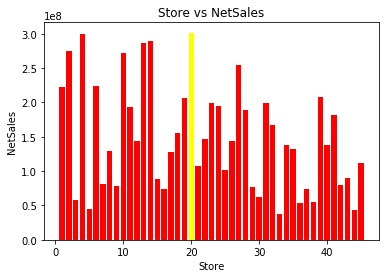

In [321]:
# plotting bar graph between stores and netsales

patch = plt.bar(list(sales.keys()), sales.values(), color = 'red')
patch[store_with_max_sales-1].set_facecolor('yellow')
plt.title('Store vs NetSales')
plt.xlabel('Store')
plt.ylabel('NetSales')
plt.show()

In [351]:
# calculating standard deviation of weekly sales of each store

def standard_deviation():
    std_dev = {}
    dic = df_walmart.groupby('Store')['Weekly_Sales'].apply(list).to_dict()
    for i in range(1,max(df_walmart['Store']+1)):
        std_dev[i] = statistics.stdev(dic[i])
    return std_dev   
std_dev = standard_deviation()
print(std_dev)

{1: 155980.76776119988, 2: 237683.69468179933, 3: 46319.63155690983, 4: 266201.4422969776, 5: 37737.96574474509, 6: 212525.85586197747, 7: 112585.46921978754, 8: 106280.82988091328, 9: 69028.66658471411, 10: 302262.06250448094, 11: 165833.88786308066, 12: 139166.87188038277, 13: 265506.9957755695, 14: 317569.9494755083, 15: 120538.6520431907, 16: 85769.68013311693, 17: 112162.93608702629, 18: 176641.51083924595, 19: 191722.63873007408, 20: 275900.562742414, 21: 128752.81285322401, 22: 161251.3506309915, 23: 249788.03806798684, 24: 167745.67756711712, 25: 112976.78860046036, 26: 110431.28814099333, 27: 239930.13568818377, 28: 181758.96753857302, 29: 99120.136596145, 30: 22809.665590198503, 31: 125855.94293256958, 32: 138017.252087409, 33: 24132.927322245512, 34: 104630.16467575563, 35: 211243.4577914686, 36: 60725.17357888971, 37: 21837.4611900489, 38: 42768.16944995036, 39: 217466.45483303475, 40: 119002.11285761208, 41: 187907.1627656376, 42: 50262.92552974957, 43: 40598.4132602531, 4

In [352]:
# Which store has maximum standard deviation i.e., the sales vary a lot

store_with_max_std_dev = max(std_dev, key = std_dev.get)
max_std_dev = std_dev[store_with_max_std_dev]
print("Store",store_with_max_std_dev,"has the max sales with sales value",max_std_dev)

Store 14 has the max sales with sales value 317569.9494755083


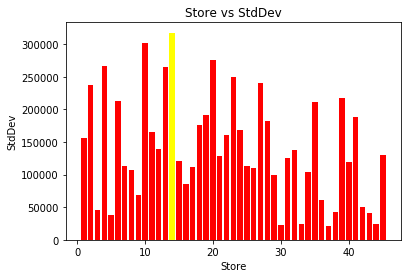

In [325]:
# plotting bar graph between stores and std_deviation

patch = plt.bar(list(std_dev.keys()), std_dev.values(), color = 'red')
patch[store_with_max_std_dev-1].set_facecolor('yellow')
plt.title('Store vs StdDev')
plt.xlabel('Store')
plt.ylabel('StdDev')
plt.show()

In [326]:
# find out the coefficient of mean to standard deviation

data = df_walmart.groupby('Store').agg({'Weekly_Sales':['mean','std']})
data.head(10)

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745
6      1.564728e+06  212525.855862
7      5.706173e+05  112585.469220
8      9.087495e+05  106280.829881
9      5.439806e+05   69028.666585
10     1.899425e+06  302262.062504

In [327]:
# calculating max growth rate for q3 2012

def max_growth_rate():
    Q32012_data = df_walmart[(pd.to_datetime(df_walmart['Date']) >= pd.to_datetime('06-04-2012')) & (pd.to_datetime(df_walmart['Date']) <= pd.to_datetime('29-06-2012'))]
    growth_rate = Q32012_data.groupby(['Store'])['Weekly_Sales'].sum()
    max_growth_rate = growth_rate.max()
    store = growth_rate.idxmax()
    
    return max_growth_rate, store, growth_rate

In [328]:
# Which store/s has good quarterly growth rate in Q3’2012

max_growth_rate, store_no, growth_rate = max_growth_rate()
print("Store",store_no,"has the max sales with sales value",max_growth_rate)


Store 4 has the max sales with sales value 11254558.91


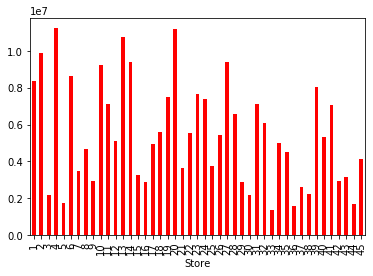

In [329]:
 growth_rate.plot.bar(color = 'red')


In [330]:
stores_nonholiday_sales = df_walmart[df_walmart['Holiday_Flag'] == 0]
non_holiday_mean_sales = stores_nonholiday_sales['Weekly_Sales'].mean()
stores_holiday_sales = df_walmart[df_walmart['Holiday_Flag'] == 1]

In [331]:
# Some holidays have a negative impact on sales. 
# Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

'''
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
'''

holiday_dates = {'Super Bowl':['12-02-2010','11-02-2011','10-02-2012'], 
                 'Labour Day':['10-09-2010','09-09-2011','07-09-2012'], 
                 'Thanksgiving':['26-11-2010','25-11-2011','23-11-2012'],
                 'Christmas':['31-12-2010','30-12-2011','28-12-2012']
                }
                                                                                                                                               
super_bowl_sales = {}
labour_day_sales = {}
thanksgiving_sales = {}
christmas_sales = {}

for i in holiday_dates['Super Bowl']:
    x = stores_holiday_sales[(pd.to_datetime(df_walmart['Date']) == pd.to_datetime(i))]
    super_bowl_sales[i] = x['Weekly_Sales'].sum()

for i in holiday_dates['Labour Day']:
    x = stores_holiday_sales[(pd.to_datetime(df_walmart['Date']) == pd.to_datetime(i))]
    labour_day_sales[i] = x['Weekly_Sales'].sum()
    
for i in holiday_dates['Thanksgiving']:
    x = stores_holiday_sales[(pd.to_datetime(df_walmart['Date']) == pd.to_datetime(i))]
    thanksgiving_sales[i] = x['Weekly_Sales'].sum()

for i in holiday_dates['Christmas']:
    x = stores_holiday_sales[(pd.to_datetime(df_walmart['Date']) == pd.to_datetime(i))]
    christmas_sales[i] = x['Weekly_Sales'].sum()
    
print("Holdays having higher sales than the mean sales in non-holiday season for all stores together: \n")

print("Mean non-holiday sales ",non_holiday_mean_sales,"\n")

for i in super_bowl_sales:
    if super_bowl_sales[i] > non_holiday_mean_sales:
        print("Super Bowl : ",i,"  ",super_bowl_sales[i])

for i in labour_day_sales:
    if labour_day_sales[i] > non_holiday_mean_sales:
        print("Labour Day : ",i,"  ",labour_day_sales[i])
        
for i in thanksgiving_sales:
    if thanksgiving_sales[i] > non_holiday_mean_sales:
        print("Thanksgiving : ",i,"  ",thanksgiving_sales[i])
        
for i in christmas_sales:
    if christmas_sales[i] > non_holiday_mean_sales:
        print("Christmas : ",i,"  ",christmas_sales[i])
        

Holdays having higher sales than the mean sales in non-holiday season for all stores together: 

Mean non-holiday sales  1041256.3802088564 

Super Bowl :  12-02-2010    48336677.63000002
Super Bowl :  11-02-2011    47336192.79
Super Bowl :  10-02-2012    50009407.92
Labour Day :  10-09-2010    45634397.84
Labour Day :  09-09-2011    46763227.529999994
Labour Day :  07-09-2012    48330059.309999995
Thanksgiving :  26-11-2010    65821003.24
Thanksgiving :  25-11-2011    66593605.26
Christmas :  31-12-2010    40432519.0
Christmas :  30-12-2011    46042461.04000001


C:\Users\C. Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\C. Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\C. Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\C. Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [332]:
Feb_2010 = df_walmart[(pd.to_datetime(df_walmart['Date']) >= pd.to_datetime('02-2010')) & (pd.to_datetime(df_walmart['Date']) <= pd.to_datetime(''))]

In [333]:
df_walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [334]:
df_wal = df_walmart[['Weekly_Sales','Date']]

In [335]:
df_wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 2 columns):
Weekly_Sales    6435 non-null float64
Date            6435 non-null object
dtypes: float64(1), object(1)
memory usage: 100.7+ KB


In [336]:
df_wal['Date'] = df_wal['Date'].astype('str') 

C:\Users\C. Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [337]:
# Provide a monthly and semester view of sales in units and give insights

yr_2010 = {} 
yr_2011 = {} 
yr_2012 = {}
sem_wise = {}
add = 0

yr_2010['Jan'] = df_wal[df_wal["Date"].str.contains("01-2010", na=False)]['Weekly_Sales'].sum()
yr_2010['Feb'] = df_wal[df_wal["Date"].str.contains("02-2010", na=False)]['Weekly_Sales'].sum()
yr_2010['Mar'] = df_wal[df_wal["Date"].str.contains("03-2010", na=False)]['Weekly_Sales'].sum()
yr_2010['Apr'] = df_wal[df_wal["Date"].str.contains("04-2010", na=False)]['Weekly_Sales'].sum()
yr_2010['May'] = df_wal[df_wal["Date"].str.contains("05-2010", na=False)]['Weekly_Sales'].sum()
yr_2010['Jun'] = df_wal[df_wal["Date"].str.contains("06-2010", na=False)]['Weekly_Sales'].sum()
yr_2010['Jul'] = df_wal[df_wal["Date"].str.contains("07-2010", na=False)]['Weekly_Sales'].sum()
yr_2010['Aug'] = df_wal[df_wal["Date"].str.contains("08-2010", na=False)]['Weekly_Sales'].sum()
yr_2010['Sep'] = df_wal[df_wal["Date"].str.contains("09-2010", na=False)]['Weekly_Sales'].sum()
yr_2010['Oct'] = df_wal[df_wal["Date"].str.contains("10-2010", na=False)]['Weekly_Sales'].sum()
yr_2010['Nov'] = df_wal[df_wal["Date"].str.contains("11-2010", na=False)]['Weekly_Sales'].sum()
yr_2010['Dec'] = df_wal[df_wal["Date"].str.contains("12-2010", na=False)]['Weekly_Sales'].sum()

yr_2011['Jan'] = df_wal[df_wal["Date"].str.contains("01-2011", na=False)]['Weekly_Sales'].sum()
yr_2011['Feb'] = df_wal[df_wal["Date"].str.contains("02-2011", na=False)]['Weekly_Sales'].sum()
yr_2011['Mar'] = df_wal[df_wal["Date"].str.contains("03-2011", na=False)]['Weekly_Sales'].sum()
yr_2011['Apr'] = df_wal[df_wal["Date"].str.contains("04-2011", na=False)]['Weekly_Sales'].sum()
yr_2011['May'] = df_wal[df_wal["Date"].str.contains("05-2011", na=False)]['Weekly_Sales'].sum()
yr_2011['Jun'] = df_wal[df_wal["Date"].str.contains("06-2011", na=False)]['Weekly_Sales'].sum()
yr_2011['Jul'] = df_wal[df_wal["Date"].str.contains("07-2011", na=False)]['Weekly_Sales'].sum()
yr_2011['Aug'] = df_wal[df_wal["Date"].str.contains("08-2011", na=False)]['Weekly_Sales'].sum()
yr_2011['Sep'] = df_wal[df_wal["Date"].str.contains("09-2011", na=False)]['Weekly_Sales'].sum()
yr_2011['Oct'] = df_wal[df_wal["Date"].str.contains("10-2011", na=False)]['Weekly_Sales'].sum()
yr_2011['Nov'] = df_wal[df_wal["Date"].str.contains("11-2011", na=False)]['Weekly_Sales'].sum()
yr_2011['Dec'] = df_wal[df_wal["Date"].str.contains("12-2011", na=False)]['Weekly_Sales'].sum()

yr_2012['Jan'] = df_wal[df_wal["Date"].str.contains("01-2012", na=False)]['Weekly_Sales'].sum()
yr_2012['Feb'] = df_wal[df_wal["Date"].str.contains("02-2012", na=False)]['Weekly_Sales'].sum()
yr_2012['Mar'] = df_wal[df_wal["Date"].str.contains("03-2012", na=False)]['Weekly_Sales'].sum()
yr_2012['Apr'] = df_wal[df_wal["Date"].str.contains("04-2012", na=False)]['Weekly_Sales'].sum()
yr_2012['May'] = df_wal[df_wal["Date"].str.contains("05-2012", na=False)]['Weekly_Sales'].sum()
yr_2012['Jun'] = df_wal[df_wal["Date"].str.contains("06-2012", na=False)]['Weekly_Sales'].sum()
yr_2012['Jul'] = df_wal[df_wal["Date"].str.contains("07-2012", na=False)]['Weekly_Sales'].sum()
yr_2012['Aug'] = df_wal[df_wal["Date"].str.contains("08-2012", na=False)]['Weekly_Sales'].sum()
yr_2012['Sep'] = df_wal[df_wal["Date"].str.contains("09-2012", na=False)]['Weekly_Sales'].sum()
yr_2012['Oct'] = df_wal[df_wal["Date"].str.contains("10-2012", na=False)]['Weekly_Sales'].sum()
yr_2012['Nov'] = df_wal[df_wal["Date"].str.contains("11-2012", na=False)]['Weekly_Sales'].sum()
yr_2012['Dec'] = df_wal[df_wal["Date"].str.contains("12-2012", na=False)]['Weekly_Sales'].sum()

print("Monthly View of Sales for the year 2010\n")
for i in yr_2010: print(i," ",yr_2010[i])

print("\nMonthly View of Sales for the year 2011\n")
for i in yr_2011: print(i," ",yr_2011[i])

print("\nMonthly View of Sales for the year 2012\n")
for i in yr_2012: print(i," ",yr_2012[i])
    
add += df_wal[df_wal["Date"].str.contains("01-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("02-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("03-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("04-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("05-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("06-2010", na=False)]['Weekly_Sales'].sum()

sem_wise['Sem1_2010'] = add
add = 0

add += df_wal[df_wal["Date"].str.contains("07-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("08-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("09-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("10-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("11-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("12-2010", na=False)]['Weekly_Sales'].sum()

sem_wise['Sem2_2010'] = add
add = 0

add += df_wal[df_wal["Date"].str.contains("01-2011", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("02-2011", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("03-2011", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("04-2011", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("05-2011", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("06-2011", na=False)]['Weekly_Sales'].sum()

sem_wise['Sem1_2011'] = add
add = 0

add += df_wal[df_wal["Date"].str.contains("07-2011", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("08-2011", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("09-2011", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("10-2011", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("11-2011", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("12-2011", na=False)]['Weekly_Sales'].sum()

sem_wise['Sem2_2011'] = add
add = 0

add += df_wal[df_wal["Date"].str.contains("01-2012", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("01-2012", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("01-2012", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("01-2012", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("01-2012", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("01-2012", na=False)]['Weekly_Sales'].sum()

sem_wise['Sem1_2012'] = add
add = 0

add += df_wal[df_wal["Date"].str.contains("07-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("08-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("09-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("10-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("11-2010", na=False)]['Weekly_Sales'].sum()
add += df_wal[df_wal["Date"].str.contains("12-2010", na=False)]['Weekly_Sales'].sum()

sem_wise['Sem2_2012'] = add
add = 0

print("\nSemester View of Sales\n")
for i in sem_wise: print(i," ",sem_wise[i])


Monthly View of Sales for the year 2010

Jan   0.0
Feb   190332983.04000002
Mar   181919802.5
Apr   231412368.05
May   186710934.34000003
Jun   192246172.36
Jul   232580125.98
Aug   187640110.89
Sep   177267896.37
Oct   217161824.02
Nov   202853370.14
Dec   288760532.72

Monthly View of Sales for the year 2011

Jan   163703966.82999998
Feb   186331327.87
Mar   179356448.29000002
Apr   226526510.97
May   181648158.16
Jun   189773385.19
Jul   229911398.87
Aug   188599332.25
Sep   220847738.42000002
Oct   183261283.14999998
Nov   210162354.87
Dec   288078102.48

Monthly View of Sales for the year 2012

Jan   168894471.66
Feb   192063579.54000002
Mar   231509650.49
Apr   188920905.95
May   188766479.45
Jun   240610329.28999996
Jul   187509452.39999998
Aug   236850765.68
Sep   180645544.47
Oct   184361680.42000002
Nov   0.0
Dec   0.0

Semester View of Sales

Sem1_2010   982622260.2900001
Sem2_2010   1306263860.12
Sem1_2011   1127339797.31
Sem2_2011   1320860210.04
Sem1_2012   1013366829.959

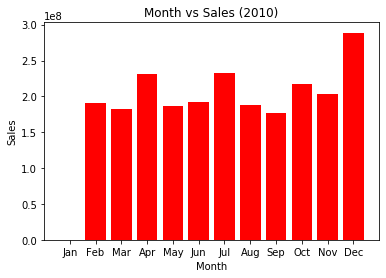

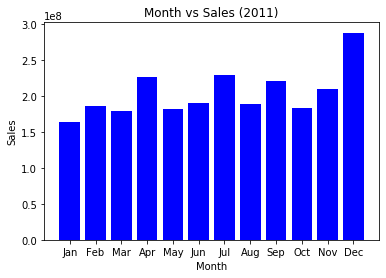

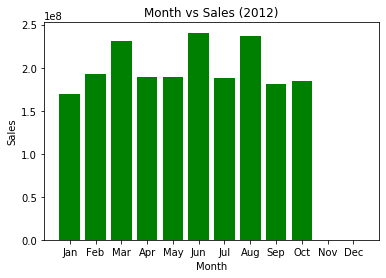

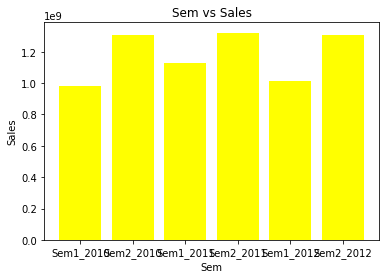

In [338]:
plt.bar(list(yr_2010.keys()), yr_2010.values(), color = 'red')
plt.title('Month vs Sales (2010)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

plt.bar(list(yr_2011.keys()), yr_2011.values(), color = 'Blue')
plt.title('Month vs Sales (2011)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

plt.bar(list(yr_2012.keys()), yr_2012.values(), color = 'Green')
plt.title('Month vs Sales (2012)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

plt.bar(list(sem_wise.keys()), sem_wise.values(), color = 'Yellow')
plt.title('Sem vs Sales')
plt.xlabel('Sem')
plt.ylabel('Sales')
plt.show()


# Statistical Model

In [339]:
df1 = df_walmart[df_walmart['Store'] == 1]
for i in range(df1['Date'].count()):
    df1.Date[i] = i+1  
df1

C:\Users\C. Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\C. Dev\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,3,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,4,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,139,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,140,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,141,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,142,1508068.77,0,67.97,3.594,223.425723,6.573


In [340]:
x = df1[df1.columns.difference(['Weekly_Sales'])]
y = df1.iloc[:,2:3]
print(x)
print(y)

            CPI Date  Fuel_Price  Holiday_Flag  Store  Temperature  \
0    211.096358    1       2.572             0      1        42.31   
1    211.242170    2       2.548             1      1        38.51   
2    211.289143    3       2.514             0      1        39.93   
3    211.319643    4       2.561             0      1        46.63   
4    211.350143    5       2.625             0      1        46.50   
..          ...  ...         ...           ...    ...          ...   
138  222.981658  139       3.666             0      1        76.08   
139  223.181477  140       3.617             0      1        68.55   
140  223.381296  141       3.601             0      1        62.99   
141  223.425723  142       3.594             0      1        67.97   
142  223.444251  143       3.506             0      1        69.16   

     Unemployment  
0           8.106  
1           8.106  
2           8.106  
3           8.106  
4           8.106  
..            ...  
138         6.908  

In [341]:
# Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 
# (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)
y_pred = LinReg.predict(x_test)
print("R2 score when every column is taken: ",r2_score(y_test,y_pred))
print("RMSE",math.sqrt(metrics.mean_squared_error(y_test,y_pred)))


lst = ['Unemployment','Weekly_Sales']
x = df1[df1.columns.difference(lst)]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)
y_pred = LinReg.predict(x_test)
print("R2 score when 'Unemployement' is excluded: ",r2_score(y_test,y_pred))
print("RMSE",math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

lst = ['CPI','Weekly_Sales']
x = df1[df1.columns.difference(lst)]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)
y_pred = LinReg.predict(x_test)
print("R2 score when 'CPI' is excluded: ",r2_score(y_test,y_pred))
print("RMSE",math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

lst = ['Fuel_Price','Weekly_Sales']
x = df1[df1.columns.difference(lst)]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)
y_pred = LinReg.predict(x_test)
print("R2 score when 'Fuel_Price' is excluded: ",r2_score(y_test,y_pred))
print("RMSE",math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

lst = ['Fuel_Price','CPI','Unemployment','Weekly_Sales']
x = df1[df1.columns.difference(lst)]
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)
y_pred = LinReg.predict(x_test)
print("R2 score when 'Unemployement','CPI','Fuel_Price' are excluded: ",r2_score(y_test,y_pred))
print("RMSE",math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 score when every column is taken:  -0.17624514247256395
RMSE 132899.303735969
R2 score when 'Unemployement' is excluded:  0.16458720185356657
RMSE 108023.25567343557
R2 score when 'CPI' is excluded:  0.020799637738257437
RMSE 101532.62564815019
R2 score when 'Fuel_Price' is excluded:  0.14848448848390183
RMSE 94804.91644364667
R2 score when 'Unemployement','CPI','Fuel_Price' are excluded:  0.14848448848390183
RMSE 94804.91644364667


In [342]:
# Change dates into days by creating new variable

df_walmart['Day'] = pd.to_datetime(df_walmart['Date']).dt.day_name()
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Monday


In [345]:
# Applying KNRegression

x = df1[df1.columns.difference(['Weekly_Sales'])]
y = df1.iloc[:,2:3]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)
rmse_val = [] 
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  
    y_pred=model.predict(x_test) 
    error = math.sqrt(metrics.mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 217396.49321722172
RMSE value for k=  2 is: 196076.84314934388
RMSE value for k=  3 is: 217751.8546382113
RMSE value for k=  4 is: 197264.72024078172
RMSE value for k=  5 is: 197751.34819473073
RMSE value for k=  6 is: 195323.74794374377
RMSE value for k=  7 is: 201180.02348185
RMSE value for k=  8 is: 199273.7982501748
RMSE value for k=  9 is: 195499.09499904513
RMSE value for k=  10 is: 196786.23470671513
RMSE value for k=  11 is: 196918.819350756
RMSE value for k=  12 is: 198650.88169475892
RMSE value for k=  13 is: 196593.7251318125
RMSE value for k=  14 is: 196645.79569415862
RMSE value for k=  15 is: 196207.05538269464
RMSE value for k=  16 is: 197993.06923764633
RMSE value for k=  17 is: 197206.8380298966
RMSE value for k=  18 is: 196803.54799334594
RMSE value for k=  19 is: 197063.46913276514
RMSE value for k=  20 is: 197837.1279661585


In [349]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
print("R2 score: ",r2_score(y_test,y_pred))

R2 score:  -0.12745656870251576
